In [1]:
%run ../../processed/myfuncs.ipynb

In [2]:
df_polygons = gpd.read_file('output/zuidbroek_afterclip.gpkg')
print(len(df_polygons))
df_polygons.head() 

2725


,gid,h_dak_min,h_dak_50p,h_dak_70p,h_dak_max,tile_id,construction_year,h_maaiveld,geometry
0,11985007,-0.006752,6.052839,6.148968,8.769760,646,2018,-0.002,"MULTIPOLYGON (((254172.858 576408.290, 254177...."
1,3149854,1.498973,7.805008,8.642453,10.314754,2311,2018,1.479,"MULTIPOLYGON (((251154.816 576076.971, 251158...."
2,11985008,1.279962,6.955098,7.008342,8.343763,646,2018,0.377,"MULTIPOLYGON (((253534.502 576874.344, 253533...."
3,11985009,0.675207,7.258006,7.469643,7.909340,646,2019,0.664,"MULTIPOLYGON (((254290.458 576393.726, 254299...."
4,11985011,2.518024,6.420846,6.740954,7.635808,646,2018,2.481,"MULTIPOLYGON (((254048.734 575708.560, 254048...."


In [3]:
df_polygons['h_maaiveld'].describe()

count    2725.000000
mean        0.806413
std         0.851654
min        -1.896000
25%         0.219000
50%         0.844000
75%         1.353000
max         3.867000
Name: h_maaiveld, dtype: float64

In [3]:
df_points = gpd.read_file('output/icesat_clip.gpkg')
print(len(df_points))
df_points.head()

146693


,x,y,z,t,confidence,track,power,geometry
0,254071.326387,578582.206190,3.009821,2018-11-09T02:04:49,4,gt1r,strong,MULTIPOINT Z (254071.326 578582.206 3.010)
1,254063.906737,578494.435303,14.250419,2018-11-09T02:04:49,2,gt1r,strong,MULTIPOINT Z (254063.907 578494.435 14.250)
2,254060.782652,578454.799000,2.422196,2018-11-09T02:04:49,4,gt1r,strong,MULTIPOINT Z (254060.783 578454.799 2.422)
3,254059.274980,578437.059569,2.030847,2018-11-09T02:04:49,4,gt1r,strong,MULTIPOINT Z (254059.275 578437.060 2.031)
4,254059.095300,578434.931556,1.914078,2018-11-09T02:04:49,4,gt1r,strong,MULTIPOINT Z (254059.095 578434.932 1.914)


In [4]:
df_points = explode_multipoint(df_points)

<AxesSubplot:>

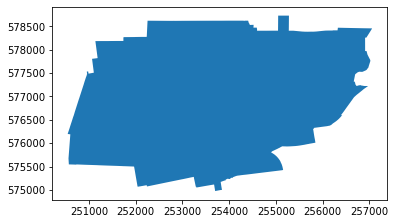

In [5]:
shp_file = 'output/boundary.gpkg'
s = gpd.read_file(shp_file).to_crs(epsg=28992)
s.plot()

In [21]:
pd.set_option('display.float_format',lambda x : '%.3f' % x)
s.area

0   17278000.607
dtype: float64

In [ ]:
# df_polygons.plot(color='grey',figsize=(10,8))

In [23]:
ex1 = df_points[(df_points['geometry'].x < 83251) & (df_points['geometry'].x > 83193)&
                (df_points['geometry'].y < 452970)& (df_points['geometry'].y > 452712)]

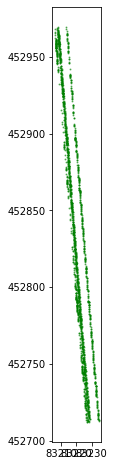

In [24]:
ax = ex1.plot(color='green', markersize=1, alpha=0.5,figsize=(12,8))

In [25]:
# get subset of different confidence(1-4)
ex1_c4 = ex1[(ex1['confidence']==4)]
ex1_c3 = ex1[(ex1['confidence']==3)]
ex1_c2 = ex1[(ex1['confidence']==2)]
ex1_c1 = ex1[(ex1['confidence']<=1)]

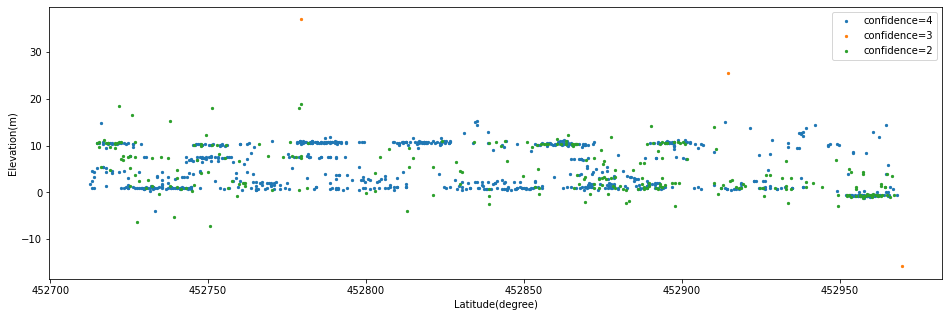

In [28]:
# different confidence of (strong and weak)
plt.figure(figsize=(16, 5))
plt.scatter(ex1_c4['geometry'].y, ex1_c4['geometry'].z, s=5, label='confidence=4') # blue
plt.scatter(ex1_c3['geometry'].y, ex1_c3['geometry'].z, s=5, label='confidence=3') # orange
plt.scatter(ex1_c2['geometry'].y, ex1_c2['geometry'].z, s=5, label='confidence=2') # green
# plt.scatter(ex1_c1['geometry'].y, ex1_c1['geometry'].z, s=5, label='confidence<=1') # red
plt.xlabel("Latitude(degree)")  # x轴的标签
plt.ylabel("Elevation(m)")
plt.legend(loc="upper right")
# bbox_to_anchor=(1.01,1), loc="upper left"
# plt.savefig('../report/export/conall.pdf') # ,dpi=600

# clean01

In [6]:
df_points_c4,df_points_c3,df_points_c2,df_points_c1 = subsets_confidence(df_points)

lenth of c4:  77701
lenth of c3:  4285
lenth of c2:  4300
lenth of c1:  60407


save  z_bar_c.png


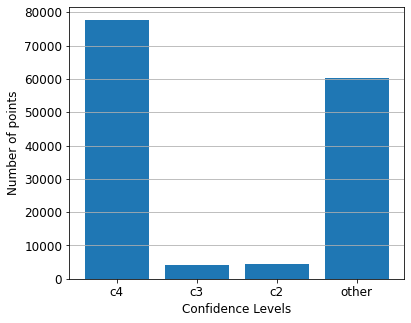

In [8]:
bar_confidence(df_points_c4,df_points_c3, df_points_c2,df_points_c1,save=True,name='z_bar_c.png')

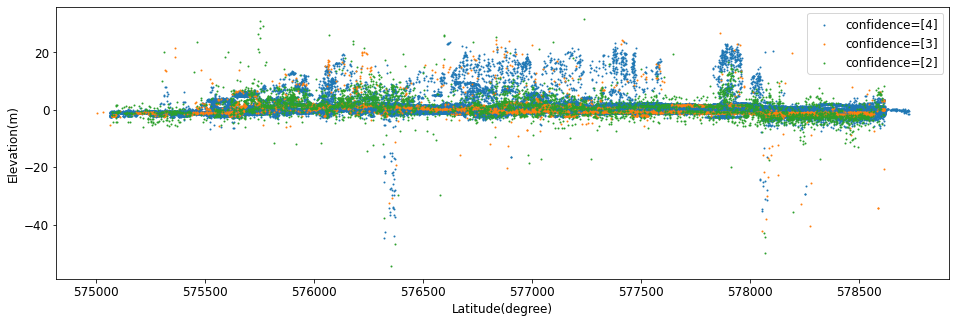

In [9]:
display_confidences(df_points_c4,df_points_c3, df_points_c2)#,save=True,name='z_confidence432.png')

In [12]:
df_pts432 = generate_df432(df_points)#, save=True)

number of c432: 86286


# clean02

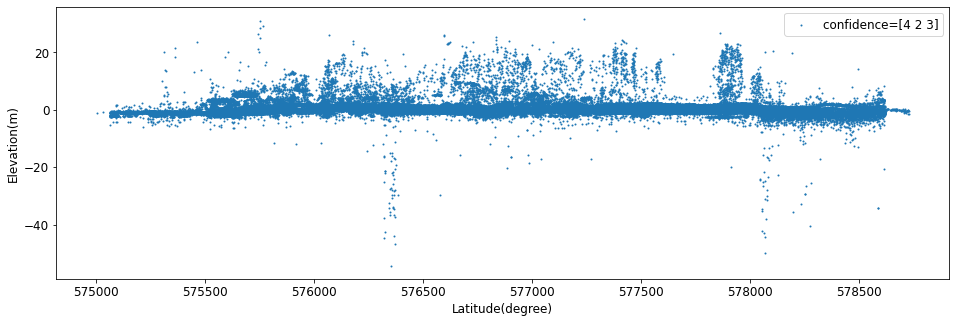

In [11]:
display_confidences(df_pts432)

In [13]:
df_pts432_clean = box_clean11(df_pts432)

count    81186.000000
mean         0.001013
std          1.279865
min         -3.914064
25%         -0.980295
50%         -0.079410
75%          0.786559
max          3.950159
Name: z, dtype: float64

after boxplot clean: 81186
time cost: 0.04139518737792969 s


{'whiskers': [<matplotlib.lines.Line2D at 0x169420220>,
 'caps': [<matplotlib.lines.Line2D at 0x169418820>,
 'boxes': [<matplotlib.lines.Line2D at 0x169429ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x169415460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1694118e0>],
 'means': []}

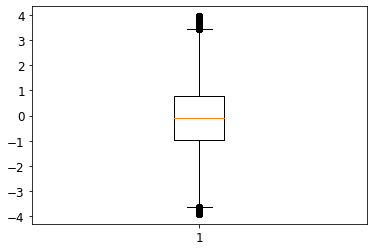

In [13]:
plt.boxplot(df_pts432_clean['z'])

save  confidence432_bplot.png


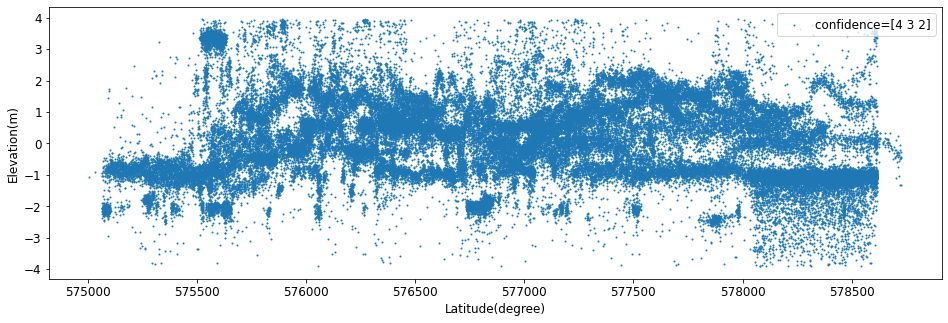

In [19]:
display_confidences(df_pts432_clean, save=True, name='confidence432_bplot.png')

In [20]:
# df_pts432_clean.to_file("output/icesat432_bplot.gpkg", driver="GPKG")

<AxesSubplot:xlabel='x', ylabel='y'>

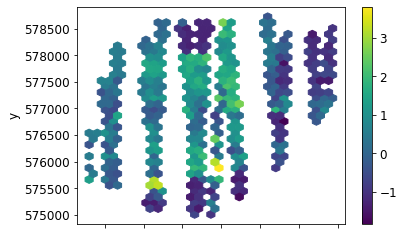

In [111]:
df_pts432_clean.plot.hexbin(x='x',y='y',C='z',gridsize=30,cmap="viridis")

<AxesSubplot:xlabel='x', ylabel='y'>

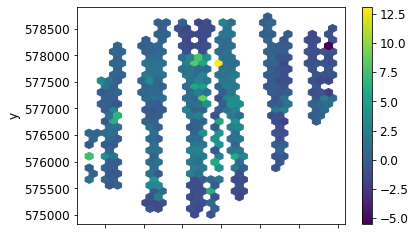

In [112]:
df_pts432.plot.hexbin(x='x',y='y',C='z',gridsize=30,cmap="viridis")

# intersections

In [14]:
df_cnt432 = intersect(df_polygons, df_pts432_clean)

length of df_cnt:  107


In [17]:
# df_cnt432.to_file("output/df_cnt432.gpkg", driver="GPKG")

save  z_whole.png


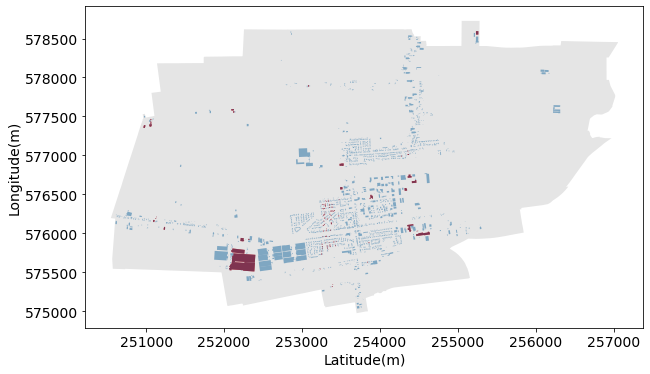

In [23]:
display_intersection(df_cnt432, df_polygons, s, save=True, name='z_whole.png')

In [37]:
df_cnt432['intersection_cnt'].describe()

count    107.000
mean      19.514
std      135.393
min        1.000
25%        1.000
50%        4.000
75%        9.000
max     1405.000
Name: intersection_cnt, dtype: float64

In [85]:
df_cnt432['intersection_cnt'].value_counts(ascending=False, sort=True)

1       28
3       11
4       10
2        7
5        6
7        6
12       5
9        5
6        5
8        4
16       4
11       3
13       3
14       3
18       2
43       1
1405     1
47       1
10       1
15       1
Name: intersection_cnt, dtype: int64

(0, 5]         62
(5, 10]        21
(10, 20]       21
(20, 100]       2
(100, 3000]     1
Name: intersection_cnt, dtype: int64

save  z_intercnt


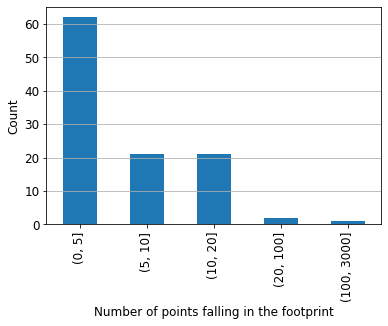

In [16]:
cnt_plot(df_cnt432,save=True,name='z_intercnt')

<AxesSubplot:>

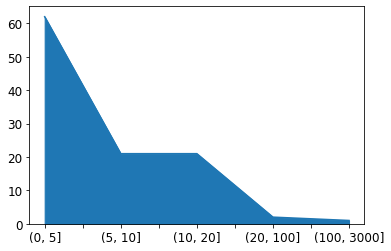

In [97]:
nn.plot.area()